In [138]:
import skimage as ski
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
import numpy as np

from skimage.util import img_as_ubyte
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny

from skimage.morphology import area_opening

from skimage.feature import blob_dog, blob_log, blob_doh
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'data/22-09-07_07h.JPG')

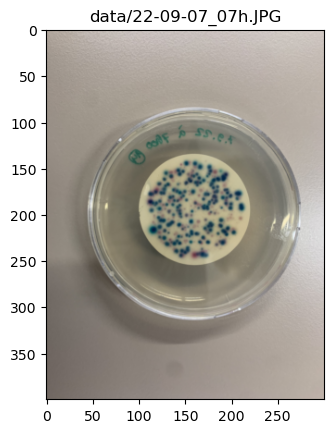

In [276]:
filename = 'data/22-09-07_07_croped.jpg'
filename = 'data/22-09-07_07h.JPG'
#filename = 'data/22-09-09_19h.JPG'
#filename = 'data/22-09-11_07h_dillu10x.jpg'

image = ski.io.imread(filename)
#plt.imshow(image)

imlow = ski.transform.resize(image,(400,300))
#imlow = ski.transform.resize(image,(300,300))


plt.imshow(imlow)
plt.title(filename)

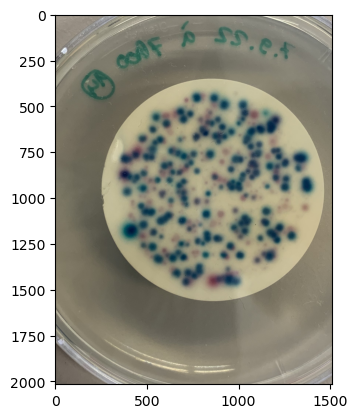

In [292]:
nlin, ncol, nlay = image.shape

nli3 = int(nlin/4)
ncol3 = int(ncol/4)

imcrop = image[nli3:3*nli3,ncol3:3*ncol3,:]
plt.imshow(imcrop)

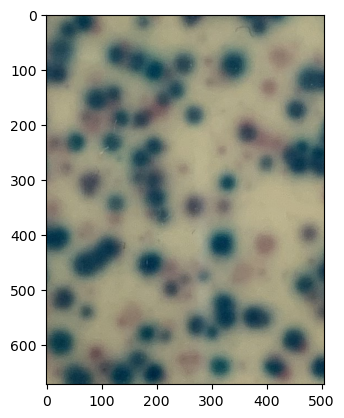

In [293]:
nlin, ncol, nlay = imcrop.shape

nli3 = int(nlin/3)
ncol3 = int(ncol/3)

imcrop = imcrop[nli3:2*nli3,ncol3:2*ncol3,:]
plt.imshow(imcrop)

In [301]:
b = imcrop[:,:,0]


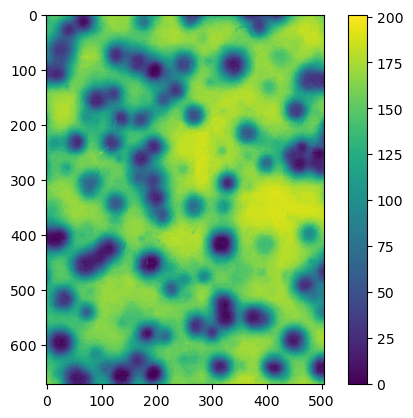

In [298]:
plt.imshow(b)
plt.colorbar()

77, 73, 58
78, 73, 57
69, 65, 50
80, 75, 59
78, 76, 60

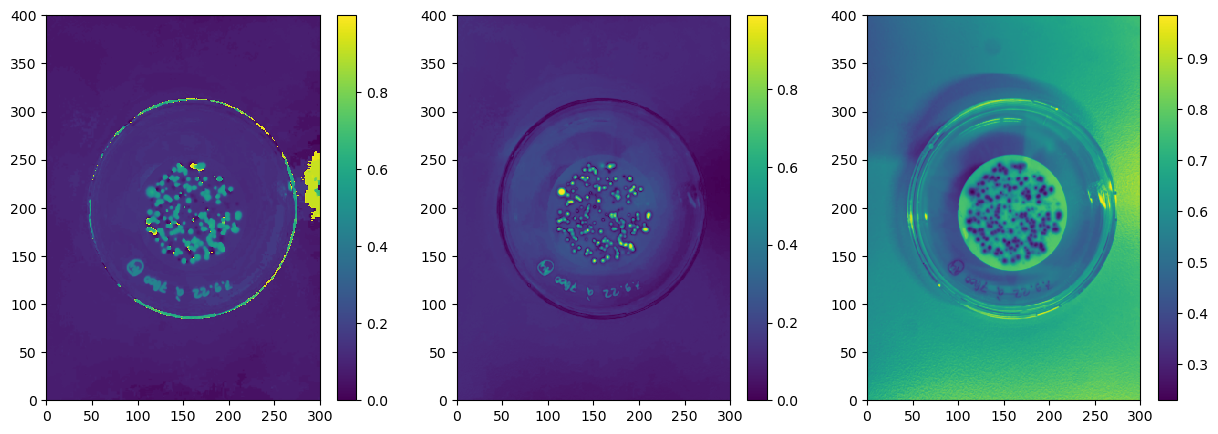

In [267]:
hsv = rgb2hsv(imlow)
h, s, v = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pcolor(hsv[:,:,i])
    plt.colorbar()


In [233]:
#Interactive selection of h values

%matplotlib qt
plt.imshow(h)
coord = plt.ginput(10)

hr = []
vr = []
sr = []
for i in range(len(coord)):
    hr.append( h[ int(coord[i][1]), int(coord[i][0])] )
    vr.append( v[ int(coord[i][1]), int(coord[i][0])] )
    sr.append( s[ int(coord[i][1]), int(coord[i][0])] )

hrmin = np.min(hr)
hrmax = np.max(hr)

vrmin = np.min(vr)
vrmax = np.max(vr)

srmin = np.min(sr)
srmax = np.max(sr)


Text(0, 0.5, 'saturation')

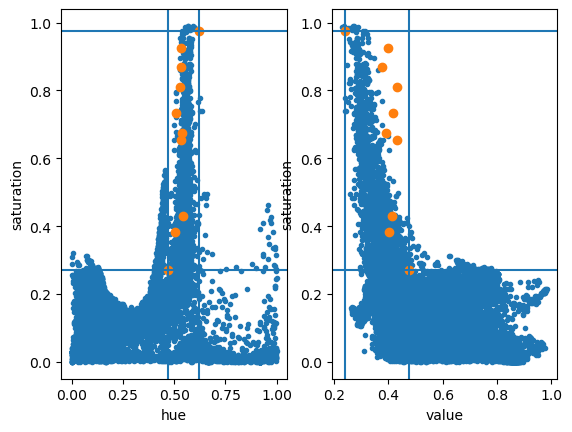

In [268]:
%matplotlib inline
sv = np.reshape(s,-1)
vv = np.reshape(v,-1)
hv = np.reshape(h,-1)

plt.subplot(1,2,1)
plt.plot(hv,sv,'.')
plt.plot(hr,sr,'o')
plt.axvline(hrmin)
plt.axvline(hrmax)
plt.axhline(srmin)
plt.axhline(srmax)
plt.xlabel('hue')
plt.ylabel('saturation')

plt.subplot(1,2,2)
plt.plot(vv,sv,'.')
plt.plot(vr,sr,'o')
plt.axvline(vrmin)
plt.axvline(vrmax)
plt.axhline(srmin)
plt.axhline(srmax)
plt.xlabel('value')
plt.ylabel('saturation')



In [269]:
X = np.stack([hv,vv,sv]).T
kmeans = KMeans(n_clusters=5).fit(X)

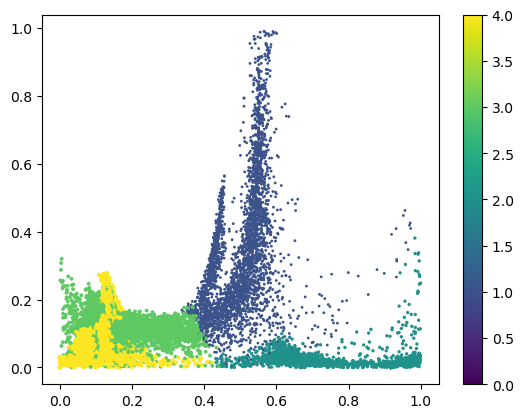

In [274]:
plt.scatter(h,s,kmeans.labels_,kmeans.labels_)
plt.colorbar()

maplabels = kmeans.labels_.copy()
maplabels.shape = (400,300)

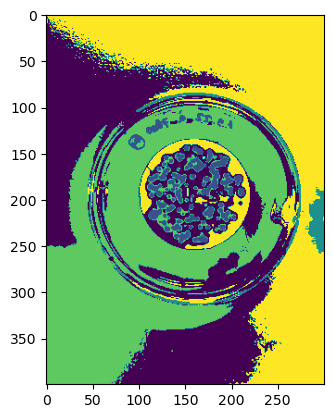

In [275]:
plt.imshow(maplabels)

Nb colonies EC: 15


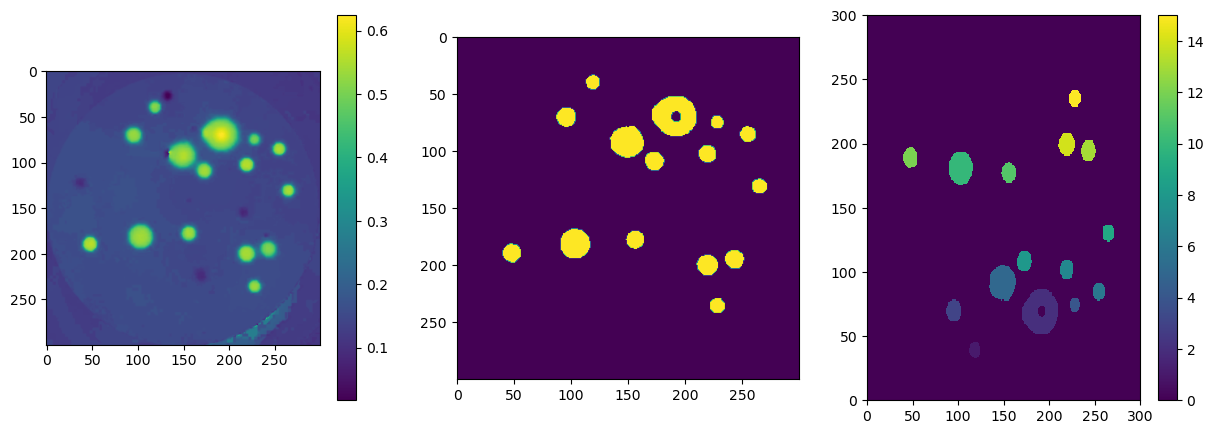

In [214]:
%matplotlib inline

#mask = (h<=0.27) & (h>=0.21)
mask = (h<=0.58) & (h>=0.45)
mask = (h<=hrmax) & (h>=hrmin)
mask = area_opening(mask, 10)
labels = ski.measure.label(mask)
nb = np.max(labels)

print(f"Nb colonies EC: {nb}")

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(h)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow( mask )

plt.subplot(1,3,3)
plt.pcolor(labels)
plt.colorbar()

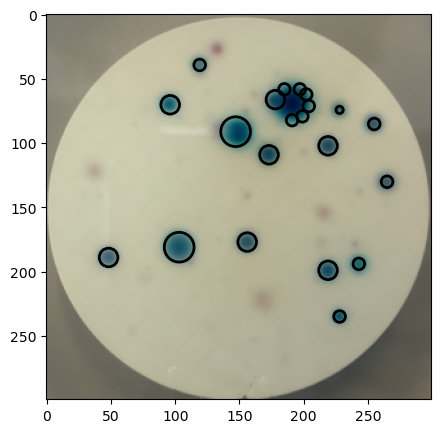

In [195]:

blobs = blob_dog(mask*v*255,2,10)

blobs_log = blobs.copy()
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs[:, 2] * np.sqrt(2)


fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(imlow)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r,  linewidth=2, fill=False)
    ax.add_patch(c)


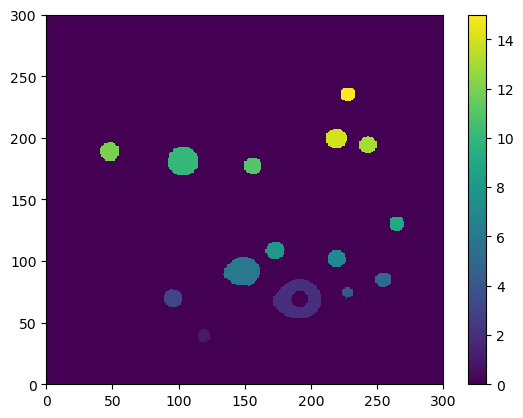

In [136]:
c = np.zeros((nb,))

for i in range(nb):
    c[i] = np.sum( labels == i )

print(c)



[8.5937e+04 1.1300e+02 9.4500e+02 2.1400e+02 8.9000e+01 5.9200e+02
 1.4100e+02 1.8000e+02 2.0100e+02 1.2900e+02 5.1200e+02 1.8200e+02
 1.9000e+02 1.9400e+02 2.4300e+02 1.3400e+02 3.0000e+00]


array([3.0000e+00, 8.9000e+01, 1.1300e+02, 1.2900e+02, 1.3400e+02,
       1.4100e+02, 1.8000e+02, 1.8200e+02, 1.9000e+02, 1.9400e+02,
       2.0100e+02, 2.1400e+02, 2.4300e+02, 5.1200e+02, 5.9200e+02,
       9.4500e+02, 8.5937e+04])

Nb colonies EC: 63


In [96]:
nbact

84

In [49]:
mask = (imlow[:,:,0] > 65/255) & (imlow[:,:,0]<80/255)

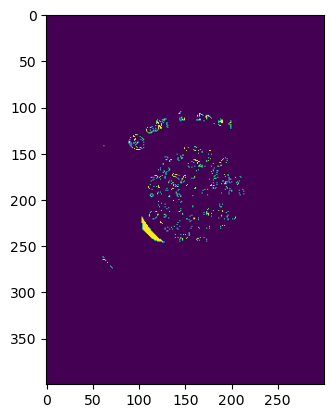

In [50]:
plt.imshow(mask)

In [40]:
image.shape

(4032, 3024, 3)

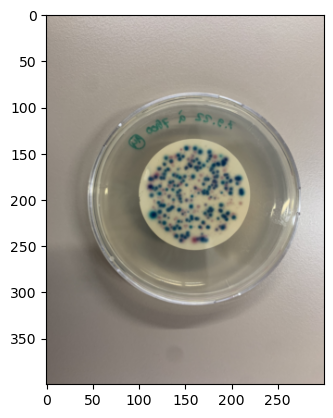

In [42]:
%matplotlib inline



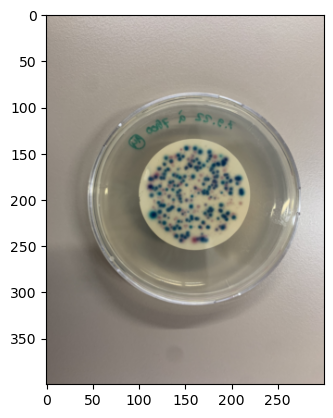

In [43]:
plt.imshow(imlow)

In [66]:

edges = canny(s, sigma=3, low_threshold=10, high_threshold=50)
edges = canny(s)



In [35]:
hough_radii = np.arange(450, 600, 10)
hough_res = hough_circle(edges, hough_radii)

In [ ]:
hough_res

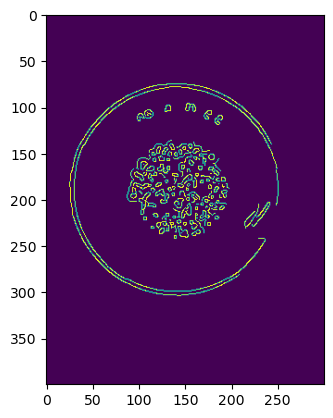

In [67]:
plt.imshow(edges)

In [16]:
%matplotlib qt
hsv_img = rgb2hsv(image)
plt.imshow(hsv_img[:,:,0])
plt.colorbar()
plt.ginput(1)



[(1441.3892714245821, 1938.401646971247)]

In [17]:
hsv_img[1441,1938,:]

array([0.13194444, 0.18320611, 0.51372549])

In [18]:
hvalue_colony


0.6274509803921569

In [19]:
hvalue_colony = 0.13
tolerance = 0.01
selection =(hsv_img[:,:,0] >= hvalue_colony-tolerance) & (hsv_img[:,:,0] <= hvalue_colony+tolerance)
plt.imshow(selection )
plt.colorbar()

In [8]:
np.max(hsv_img[:,:,0])

0.9962121212121212

In [13]:
help(ginput)

NameError: name 'ginput' is not defined